<a href="https://colab.research.google.com/github/Mohit03singh/Customer_segmentation_using_unsupervised_learning/blob/main/Customer_segmentation_using_unsupervised_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**NAME** : Mohit

**COHORT** : SANTIAGO

**TYPE** : INDIVIDUAL

GITHUB LINK :

### **What is customer segmentation?**

#### Customer segmentation is a way to split customers into groups based on certain characteristics that those customers share. All customers share the common need of your product or service, but beyond that, there are distinct demographic differences (i.e., age, gender) and they tend to have additional socio-economic, lifestyle, or other behavioral differences that can be useful to the organization.


### **Why segment customers?**

#### Segmentation allows marketers to better tailor their marketing efforts to various audience subsets. Those efforts can relate to both communications and product development. Specifically, segmentation helps a company:

  * Create and communicate targeted marketing messages that will resonate with specific groups of customers, but not with others (who will receive messages tailored to their needs and interests, instead).
  * Select the best communication channel for the segment, which might be email, social media posts, radio advertising, or another approach, depending on the segment.
  * Identify ways to improve products or new product or service opportunities.
  * Establish better customer relationships.
  * Test pricing options.
  * Focus on the most profitable customers.
  * Improve customer service.
  * Upsell and cross-sell other products and services.

### <b> Data Description: </b>

#### <b>Attribute Information: </b>

* #### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* #### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* #### Description: Product (item) name. Nominal.
* #### Quantity: The quantities of each product (item) per transaction. Numeric.
* #### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* #### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* #### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* #### Country: Country name. Nominal, the name of the country where each customer reside

In [68]:
#IMPORT THE LIBRARIES

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
import datetime as dt

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import metrics

In [69]:
# load the dataset

df = pd.read_csv('/content/Onilne_retail_data.csv')

In [70]:
cust_data = df.copy()

In [71]:
cust_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [72]:
cust_data.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
422791,573117,23351,ROLL WRAP 50'S CHRISTMAS,24,10/27/11 16:11,1.25,16688.0,United Kingdom
422792,573117,23352,ROLL WRAP 50'S RED CHRISTMAS,24,10/27/11 16:11,1.25,16688.0,United Kingdom
422793,573117,23354,6 GIFT TAGS 50'S CHRISTMAS,48,10/27/11 16:11,0.83,16688.0,United Kingdom
422794,573117,23228,FILIGREE HEART BIRD WHITE,24,10/27/11 16:11,1.25,16688.0,United Kingdom
422795,573117,22727,ALARM CLOCK BAKELIKE RED,4,10/27/11 16:11,3.75,16688.0,United Kin


In [73]:
cust_data.describe()

,Quantity,UnitPrice,CustomerID
count,422796.000000,422796.000000,316699.000000
mean,9.824513,4.715822,15276.542461
std,170.695190,101.927587,1714.380675
min,-74215.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13890.000000
50%,3.000000,2.100000,15146.000000
75%,11.000000,4.130000,16779.000000
max,74215.000000,38970.000000,18287.000000


In [74]:
cust_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 422796 entries, 0 to 422795
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    422796 non-null  object 
 1   StockCode    422796 non-null  object 
 2   Description  421437 non-null  object 
 3   Quantity     422796 non-null  int64  
 4   InvoiceDate  422796 non-null  object 
 5   UnitPrice    422796 non-null  float64
 6   CustomerID   316699 non-null  float64
 7   Country      422796 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 25.8+ MB


In [75]:
cust_data.shape

(422796, 8)

In [76]:
cust_data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [77]:
cust_data.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

We can see that invoice no is in object format we need to convert that to date format

# **Handling missing values and Duplicates in the dataset**

In [78]:
#handling duplicate values
cust_data.duplicated().sum()

3525

We can see that there are 5268 duplicate values we need to eliminate them

In [79]:
#handling null values
cust_data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1359
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     106097
Country             0
dtype: int64

We can see that there are 1454 and 135080 null values in Description and cutomer id feature we need to eliminate them

Removal of duplicates and null values

In [80]:
cust_data.drop_duplicates(inplace = True)
cust_data.dropna(inplace = True)

In [81]:
cust_data.duplicated().sum()

0

In [82]:
cust_data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [83]:
cust_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 313210 entries, 0 to 422795
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    313210 non-null  object 
 1   StockCode    313210 non-null  object 
 2   Description  313210 non-null  object 
 3   Quantity     313210 non-null  int64  
 4   InvoiceDate  313210 non-null  object 
 5   UnitPrice    313210 non-null  float64
 6   CustomerID   313210 non-null  float64
 7   Country      313210 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 21.5+ MB


In [84]:
cust_data.shape

(313210, 8)

Earlier the shape of the dataset was (541909, 8) and now after removal of null and duplicate values it has been reduced to (401604,8)

# **Removal of Cancelled Orders**

In [85]:
cust_data['InvoiceNo'] = cust_data['InvoiceNo'].astype('str')
cust_data[cust_data['InvoiceNo'].str.startswith('C')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/10 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/10 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/10 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/10 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/10 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
422617,C573098,23092,LARGE ANTIQUE WHITE PHOTO FRAME,-1,10/27/11 14:45,7.90,15088.0,United Kingdom
422618,C573098,23013,GLASS APOTHECARY BOTTLE TONIC,-1,10/27/11 14:45,3.95,15088.0,United Kingdom
422619,C573099,22654,DELUXE SEWING KIT,-2,10/27/11 14:47,5.95,12921.0,United Kingdom
422643,C573101,23541,WALL ART CLASSIC PUDDINGS,-2,10/27/11 14:50,8.25,16592.0,United Kingdom


We can see there are 8872 orders which are cancelled and still present in the dataset hence we need to remove them

In [86]:
cust_data = cust_data[~cust_data['InvoiceNo'].str.startswith('C')]


In [87]:
cust_data.shape

(305784, 8)

Earlier the shape of the dataset was (401604,8) and now after removal of cancelled orders it has been reduced to (392732, 8)

In [88]:
cust_data.describe()

,Quantity,UnitPrice,CustomerID
count,305784.000000,305784.000000,305784.000000
mean,13.524236,3.197846,15277.675886
std,141.590272,24.364659,1714.857190
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13893.000000
50%,6.000000,1.950000,15146.000000
75%,12.000000,3.750000,16779.000000
max,74215.000000,8142.750000,18287.000000


We can see that the min values are now positive but the unitprice here cannot be 0 because it results in free distribution

In [89]:

cust_data[cust_data['UnitPrice']==0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
9302,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1,12/5/10 14:02,0.0,12647.0,Germany
33576,539263,22580,ADVENT CALENDAR GINGHAM SACK,4,12/16/10 14:36,0.0,16560.0,United Kingdom
40089,539722,22423,REGENCY CAKESTAND 3 TIER,10,12/21/10 13:45,0.0,14911.0,EIRE
47068,540372,22090,PAPER BUNTING RETROSPOT,24,1/6/11 16:41,0.0,13081.0,United Kingdom
47070,540372,22553,PLASTERS IN TIN SKULLS,24,1/6/11 16:41,0.0,13081.0,United Kingdom
56674,541109,22168,ORGANISER WOOD ANTIQUE WHITE,1,1/13/11 15:10,0.0,15107.0,United Kingdom
86789,543599,84535B,FAIRY CAKES NOTEBOOK A6 SIZE,16,2/10/11 13:08,0.0,17560.0,United Kingdom
130188,547417,22062,CERAMIC BOWL WITH LOVE HEART DESIGN,36,3/23/11 10:25,0.0,13239.0,United Kingdom
139453,548318,22055,MINI CAKE STAND HANGING STRAWBERY,5,3/30/11 12:45,0.0,13113.0,United Kingdom
145208,548871,22162,HEART GARLAND RUSTIC PADDED,2,4/4/11 14:42,0.0,14410.0,United Kingdom


There are some values which has 0 unit price we need to drop them.

In [90]:
cust_data = cust_data[cust_data['UnitPrice']>0]

cust_data.describe()

,Quantity,UnitPrice,CustomerID
count,305758.000000,305758.000000,305758.000000
mean,13.521962,3.198118,15277.732730
std,141.594779,24.365677,1714.844203
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,13894.000000
50%,6.000000,1.950000,15146.000000
75%,12.000000,3.750000,16779.000000
max,74215.000000,8142.750000,18287.000000


In [91]:
cust_data['UnitPrice'].describe()

count    305758.000000
mean          3.198118
std          24.365677
min           0.001000
25%           1.250000
50%           1.950000
75%           3.750000
max        8142.750000
Name: UnitPrice, dtype: float64

We can see that the min value of unit price is slightly changed..

cust_data.shape

The data is almost cleaned and ready for EDA

# **Feature Engineering**

#### Feature engineering is a machine learning technique that leverages data to create new variables that aren’t in the training set. It can produce new features for both supervised and unsupervised learning, with the goal of simplifying and speeding up data transformations while also enhancing model accuracy.

In [92]:
cust_data['InvoiceDate'] = cust_data['InvoiceDate'].apply(lambda x: pd.to_datetime(x))


In [93]:
cust_data['InvoiceDate'].dtypes

dtype('<M8[ns]')

In [94]:
# create some new features from invoice date
cust_data['day'] = cust_data['InvoiceDate'].dt.day_name()
cust_data['year'] = cust_data['InvoiceDate'].apply(lambda x: x.year)
cust_data['month_num'] = cust_data['InvoiceDate'].apply(lambda x: x.month)
cust_data['day_num'] = cust_data['InvoiceDate'].apply(lambda x: x.day)
cust_data['hour'] = cust_data['InvoiceDate'].apply(lambda x: x.hour)
cust_data['minute'] = cust_data['InvoiceDate'].apply(lambda x: x.minute)
cust_data['month'] = cust_data['InvoiceDate'].dt.month_name()

In [95]:
cust_data['Total_amount'] = cust_data['UnitPrice']*cust_data['Quantity']

# **Exploratory Data Analysis**


What is Exploratory Data Analysis (EDA) ?

EDA is a phenomenon under data analysis used for gaining a better understanding of data aspects like: – main features of data – variables and relationships that hold between them – identifying which variables are important for our problem We shall look at various exploratory data analysis methods like:

Descriptive Statistics, which is a way of giving a brief overview of the dataset we are dealing with, including some measures and features of the sample Grouping data [Basic grouping with group by]

ANOVA, Analysis Of Variance, which is a computational method to divide variations in an observations set into different components.

Correlation and correlation methods

# **1. MOST SOLD PRODUCTS**

In [96]:
most_sold = cust_data['Description'].value_counts().reset_index()
most_sold.rename(columns = {'index':'Product_Name','Description':'No_of_items_Count'}, inplace =True)
most = most_sold.head()

In [97]:
most

,Product_Name,No_of_items_Count
0,WHITE HANGING HEART T-LIGHT HOLDER,1698
1,REGENCY CAKESTAND 3 TIER,1472
2,JUMBO BAG RED RETROSPOT,1343
3,PARTY BUNTING,1291
4,LUNCH BAG RED RETROSPOT,1124


<ipython-input-98-d693193e060e>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Product_Name',y='No_of_items_Count', data = most,palette='viridis')


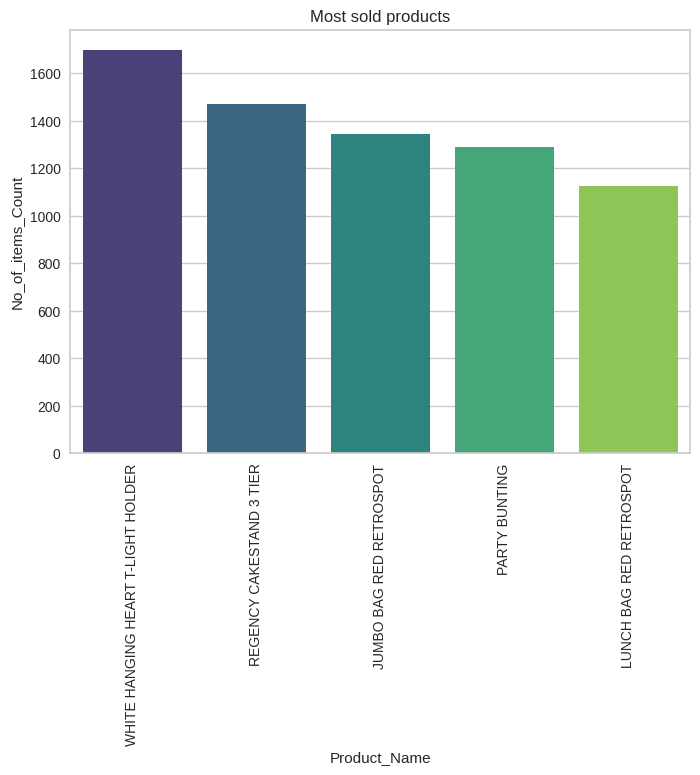

In [98]:
sns.barplot(x='Product_Name',y='No_of_items_Count', data = most,palette='viridis')
plt.title("Most sold products")
plt.xticks(rotation = 90)
plt.show()

The Five most sold products are:

1.WHITE HANGING HEART T-LIGHT HOLDER(2016)

2.REGENCY CAKESTAND 3 TIER(1713)

3.JUMBO BAG RED RETROSPOT(1615)

4.ASSORTED COLOUR BIRD ORNAMENT(1395)

5.PARTY BUNTING(1389)

In [99]:
least = most_sold.tail()

<ipython-input-100-caf63a19b1b1>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Product_Name',y='No_of_items_Count', data = least,palette='viridis')


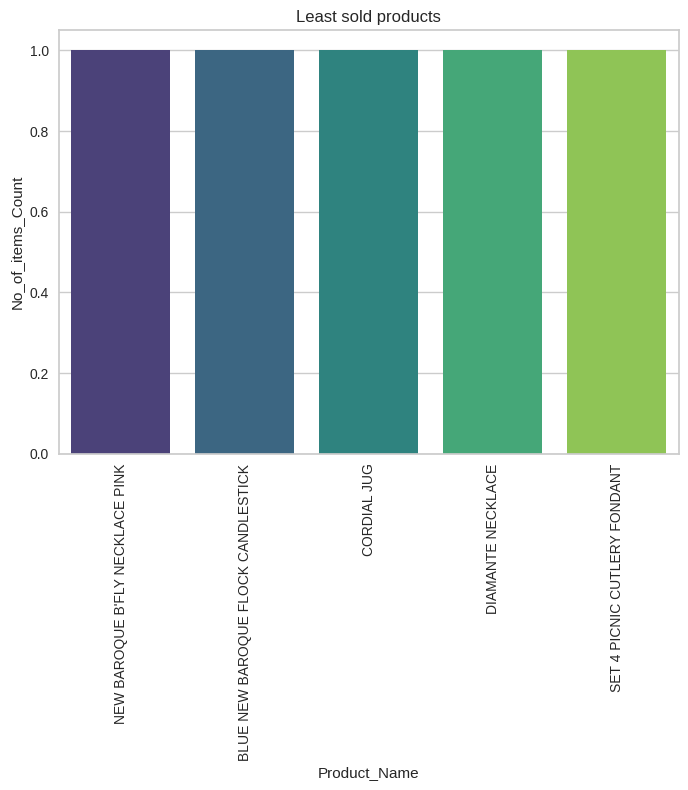

In [100]:
sns.barplot(x='Product_Name',y='No_of_items_Count', data = least,palette='viridis')
plt.title("Least sold products")
plt.xticks(rotation = 90)
plt.show()

The least sold products are :    

1.Green with metal bag charm

2.White with metal bag charm and so on..

# **COUNTRY WITH HIGHEST NUMBER OF CUSTOMERS**

In [101]:
Country = cust_data['Country'].value_counts().reset_index()
Country.rename(columns = {'index':'Country_Name','Country':'No_of_Customers'},inplace =True)
country_with_most = Country.head()

In [102]:
country_with_most

,Country_Name,No_of_Customers
0,United Kingdom,270070
1,Germany,7517
2,France,6408
3,EIRE,5840
4,Netherlands,2048


<ipython-input-103-47664cfc3c97>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Country_Name',y='No_of_Customers', data = country_with_most,palette='magma')


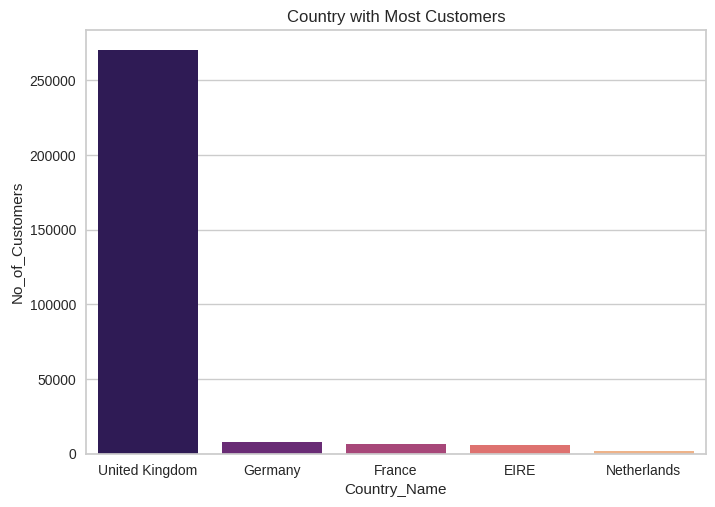

In [103]:
sns.barplot(x='Country_Name',y='No_of_Customers', data = country_with_most,palette='magma')
plt.title("Country with Most Customers")
plt.show()

We can see that majority of the customers are from United kingdom followed by small portions of Germany,France etc..

<ipython-input-104-77d00bd1d6b2>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Country_Name',y='No_of_Customers', data = Country.tail(),palette='magma')


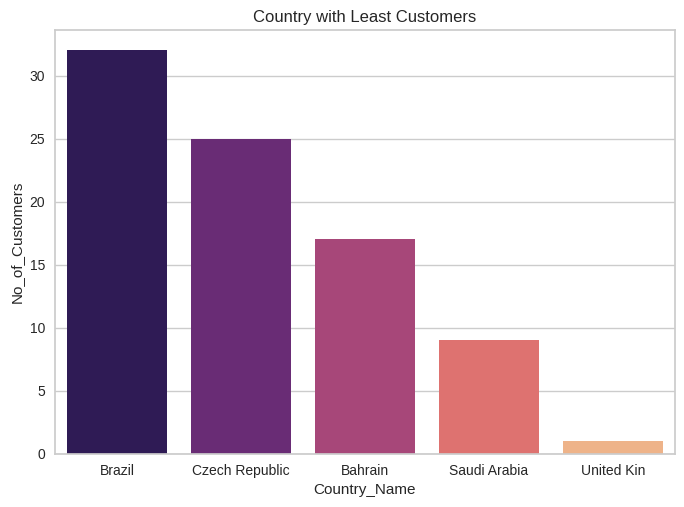

In [104]:
sns.barplot(x='Country_Name',y='No_of_Customers', data = Country.tail(),palette='magma')
plt.title("Country with Least Customers")
plt.show()

In [105]:
Unique_Cust = cust_data['CustomerID'].unique()

In [106]:
Unique_Cust.shape

(3937,)

We can see that there are only 4338 customers present and are responsible for all these transactions let us now understand the percentage share of the top 10 customers

In [107]:
percentage = (cust_data['CustomerID'].value_counts()/sum(cust_data['CustomerID'].value_counts())*100).reset_index()
percentage.columns = ['Customer ID', 'Percentage_share']
new = percentage.head().cumsum()
new.head()

,Customer ID,Percentage_share
0,17841.0,1.865855
1,32752.0,3.297052
2,45500.0,4.124504
3,60106.0,4.871500
4,74202.0,5.608357


<ipython-input-108-78b9607f558f>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Customer ID',y='Percentage_share', data=percentage[:10].cumsum(),palette='Spectral')


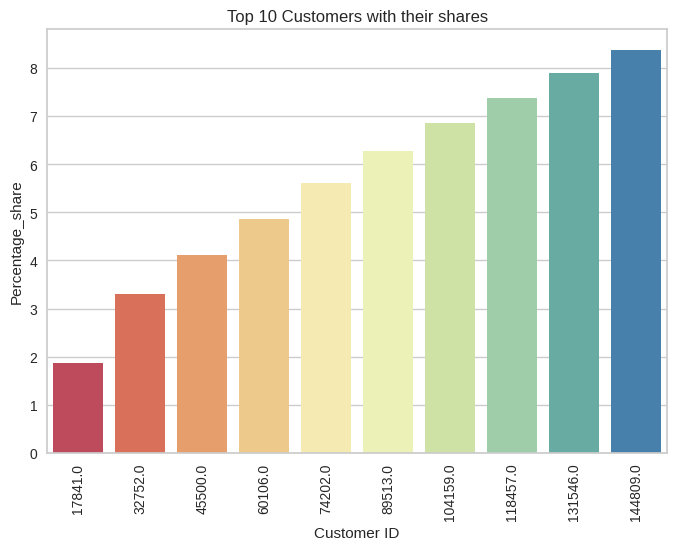

In [108]:
sns.barplot(x='Customer ID',y='Percentage_share', data=percentage[:10].cumsum(),palette='Spectral')
plt.title("Top 10 Customers with their shares")
plt.xticks(rotation = 90)
plt.show()

From the above figure we can infer that the top ten customers out of 4338 have contributed nearly 8 to 9% of total share.

We can infer them as big buyers or wholesalers.


# **Distribution of the datasets**

<ipython-input-109-554591dbef26>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,count)
<ipython-input-109-554591dbef26>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cust_data[feature])
<ipython-input-109-554591dbef26>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your co

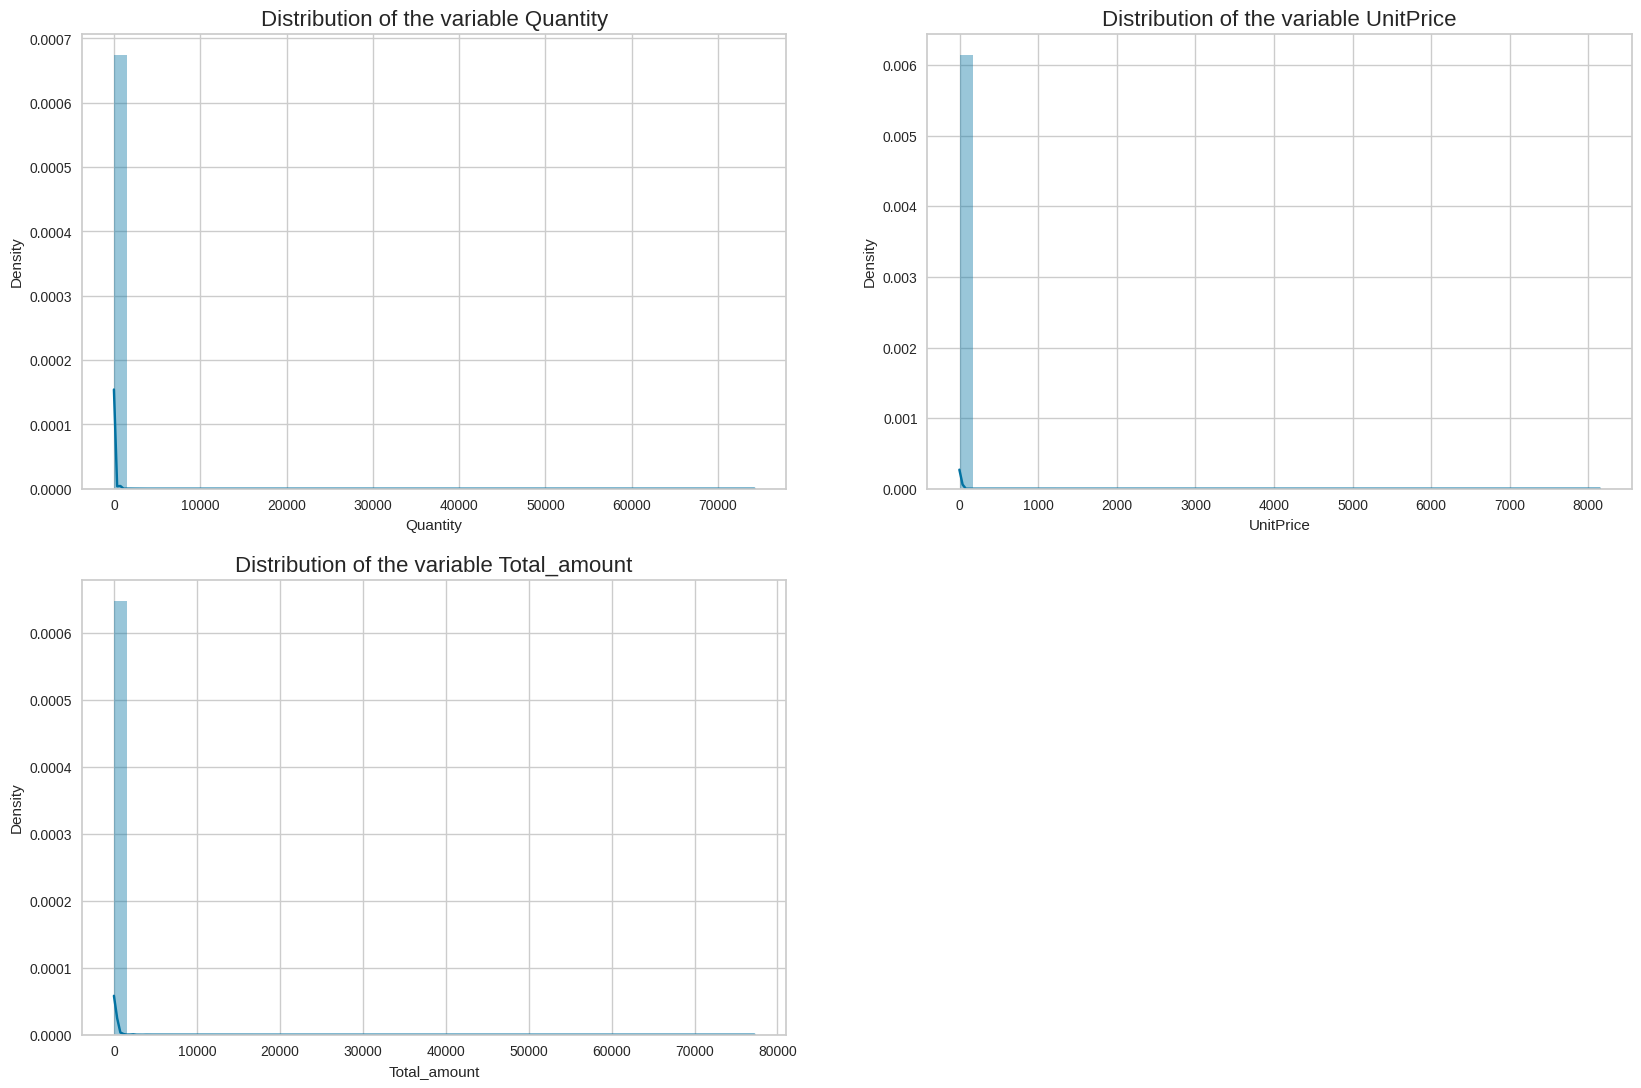

In [109]:
num_features = ['Quantity', 'UnitPrice', 'Total_amount']
count = 1
plt.subplots(figsize=(20,13))
for feature in num_features:
  plt.subplot(2,2,count)
  sns.distplot(cust_data[feature])
  plt.title(f"Distribution of the variable {feature}", fontsize=16)
  plt.xlabel(f"{feature}")
  plt.ylabel("Density")
  count += 1

From the above distribution plots are heavily right skewed. it is very hard to find out the distribution hence we will apply log Transformation function to it.

<ipython-input-110-7c8e9706488a>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,count)
<ipython-input-110-7c8e9706488a>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log1p(cust_data[feature]),color='green')
<ipython-input-110-7c8e9706488a>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a g

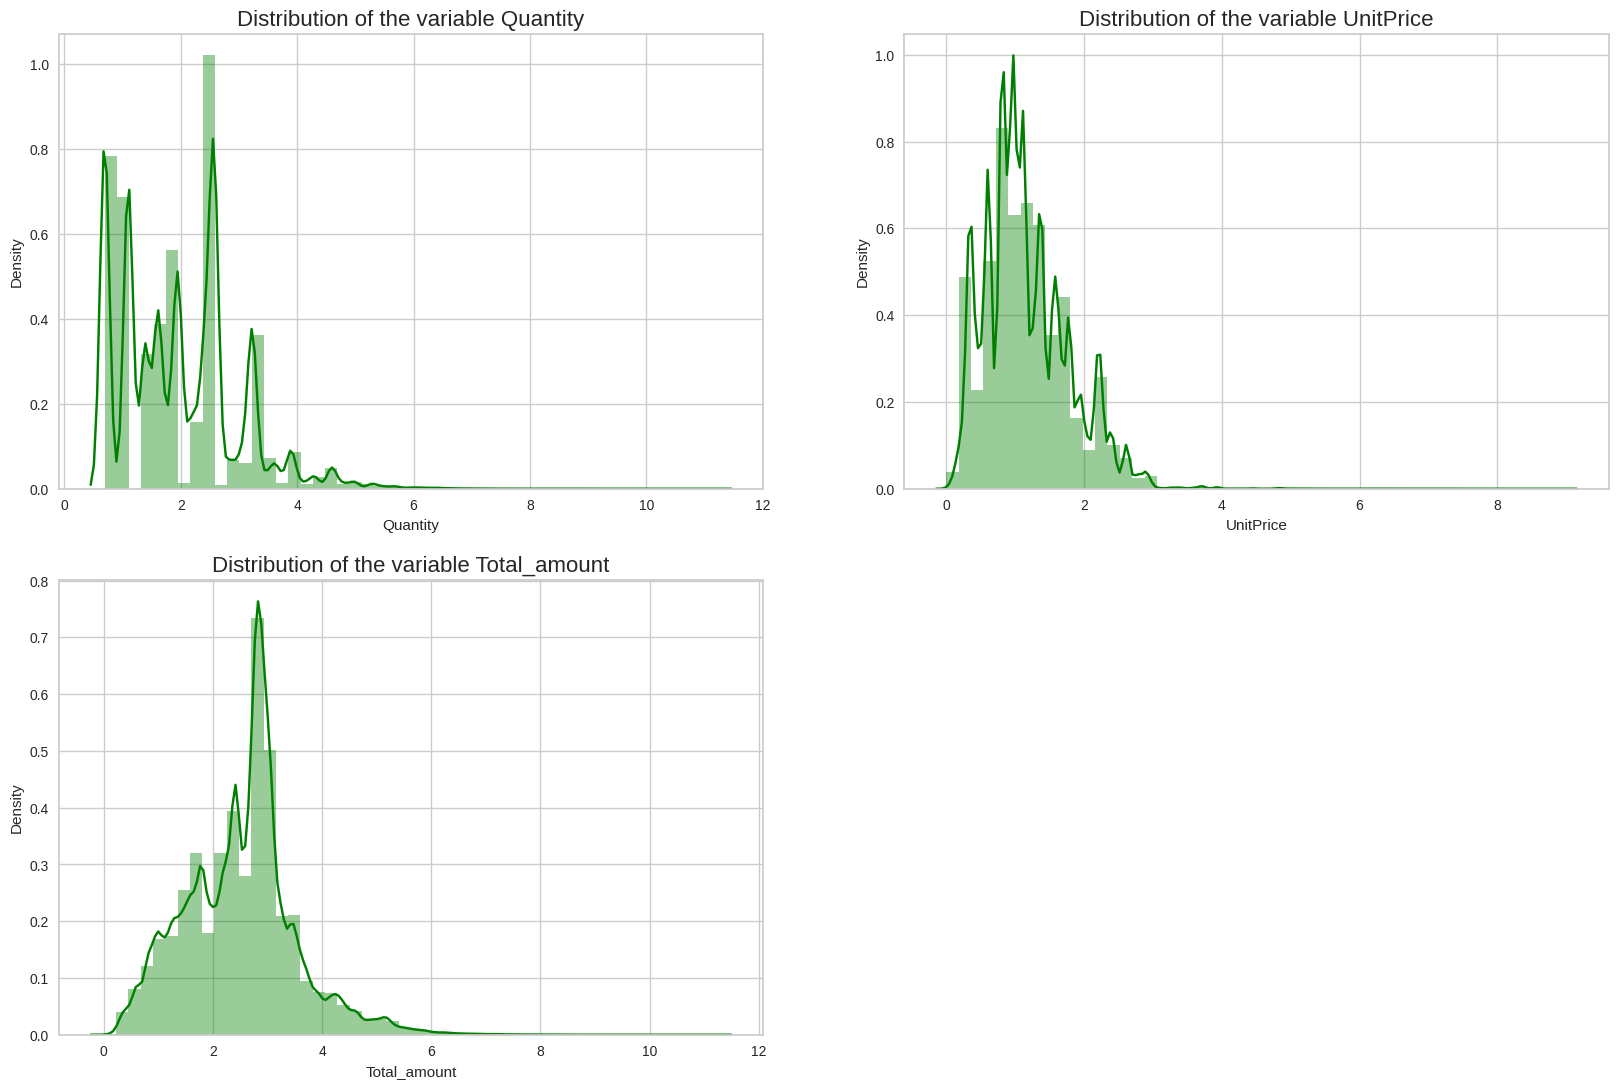

In [110]:
# taking a log transformation
count = 1
plt.subplots(figsize=(20,13))
for feature in num_features:
  plt.subplot(2,2,count)
  sns.distplot(np.log1p(cust_data[feature]),color='green')
  plt.title(f"Distribution of the variable {feature}", fontsize=16)
  plt.xlabel(f"{feature}")
  plt.ylabel("Density")
  count += 1

# **Most Purchases made in Hour/day/week/month/year**

# **1.Which day had the most purchases.**

In [111]:
day = cust_data['day'].value_counts().reset_index()
day.rename(columns = {'index':'Day','day':'Counts'},inplace = True)
day

,Day,Counts
0,Thursday,63604
1,Wednesday,54044
2,Tuesday,51741
3,Monday,49511
4,Sunday,45103
5,Friday,41755


We can infer from the chart that people have purchased more items on Thursday followed by Wednesday and Tuesday and people have purchased least on Fridays.

In [112]:
def name_day(day):
  if day in ['Monday','Tuesday','Wednesday','Thursday','Friday']:
    return 'Week Day'
  else:
    return 'Week End'

cust_data['name_day'] = cust_data['day'].apply(name_day)
cust_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,day,year,month_num,day_num,hour,minute,month,Total_amount,name_day
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Wednesday,2010,12,1,8,26,December,15.30,Week Day
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,2010,12,1,8,26,December,20.34,Week Day
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Wednesday,2010,12,1,8,26,December,22.00,Week Day
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,2010,12,1,8,26,December,20.34,Week Day
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,2010,12,1,8,26,December,20.34,Week Day


In [113]:
dist_days = cust_data['name_day'].value_counts().reset_index()
dist_days.rename(columns = {'index':'Type of day','name_day':'Counts'},inplace = True)
dist_days

,Type of day,Counts
0,Week Day,260655
1,Week End,45103


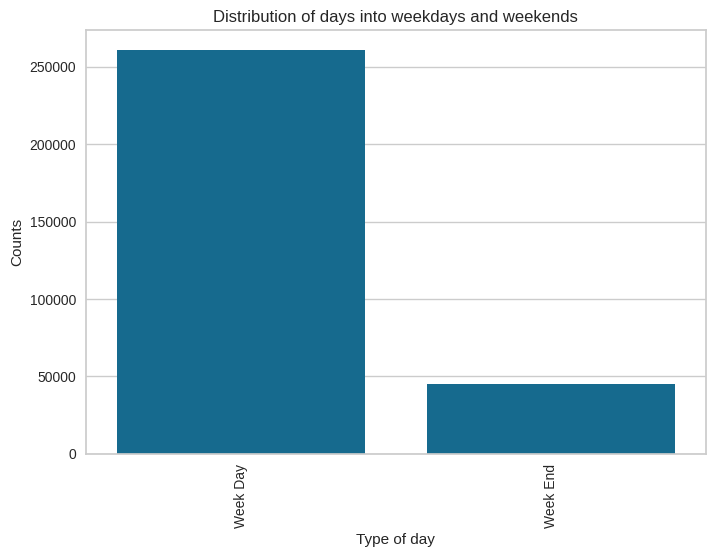

In [114]:
sns.barplot(x='Type of day',y='Counts',data = dist_days)
plt.title("Distribution of days into weekdays and weekends")
plt.xticks(rotation =90)
plt.show()

# **2.Which month had most and least number of purchases**

In [115]:
month = cust_data['month'].value_counts().reset_index()
month.rename(columns = {'index':'Month Name','month':'Count'},inplace = True)
month

,Month Name,Count
0,October,42053
1,September,39669
2,May,28073
3,June,26926
4,March,26870
5,August,26790
6,July,26580
7,December,25670
8,April,22433
9,January,20988


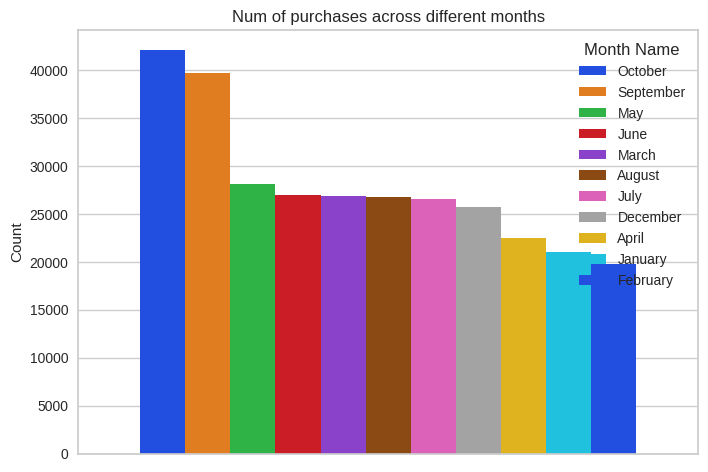

In [116]:
sns.barplot(hue='Month Name',y='Count',data=month,palette='bright')
plt.title("Num of purchases across different months")
plt.xticks(rotation = 90)
plt.show()

People have purchased more on November followed by October and December may be due to Festivals and people have purchased least during Feb this may be due to Winter season

In [117]:
# Grouping the months into four seasons

def season(month):
  if month in ['March','April','May']:
    return 'Spring Season'
  elif month in ['June','July','August']:
    return 'Summer Season'
  elif month in ['September','October','November']:
    return 'Autumn Season'
  else:
    return 'Winter Season'


cust_data['season'] = cust_data['month'].apply(season)
cust_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,day,year,month_num,day_num,hour,minute,month,Total_amount,name_day,season
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Wednesday,2010,12,1,8,26,December,15.30,Week Day,Winter Season
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,2010,12,1,8,26,December,20.34,Week Day,Winter Season
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Wednesday,2010,12,1,8,26,December,22.00,Week Day,Winter Season
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,2010,12,1,8,26,December,20.34,Week Day,Winter Season
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,2010,12,1,8,26,December,20.34,Week Day,Winter Season


In [118]:
season_counts = cust_data['season'].value_counts().reset_index()
season_counts.rename(columns = {'index':'Season','season':'Counts'},inplace = True)
season_counts

,Season,Counts
0,Autumn Season,81722
1,Summer Season,80296
2,Spring Season,77376
3,Winter Season,66364


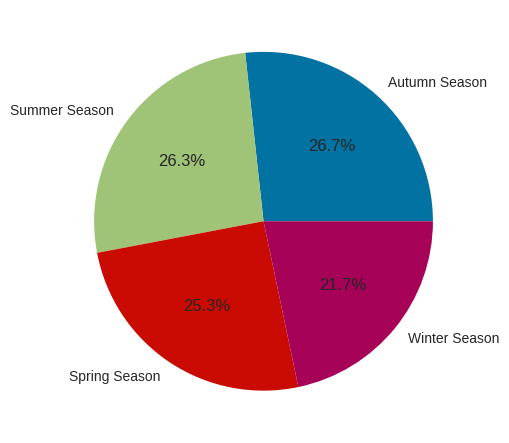

In [119]:
plt.pie('Counts',labels='Season',data=season_counts,autopct="%1.1f%%")
plt.show()

We can see that people have made more purchases in Autumn season that is during the months of September,October and November.

# **3. Number of purchases made across each hour**

In [120]:
hour = cust_data['hour'].value_counts().reset_index()
hour.rename(columns = {'index':'Hour Name','hour':'Count'},inplace = True)
hour

,Hour Name,Count
0,12,54444
1,13,49774
2,14,40845
3,11,37798
4,15,35268
5,10,31065
6,9,18450
7,16,16776
8,17,9099
9,8,6697


<ipython-input-121-613328131dc8>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Hour Name',y='Count',data=hour,palette='Paired_r')


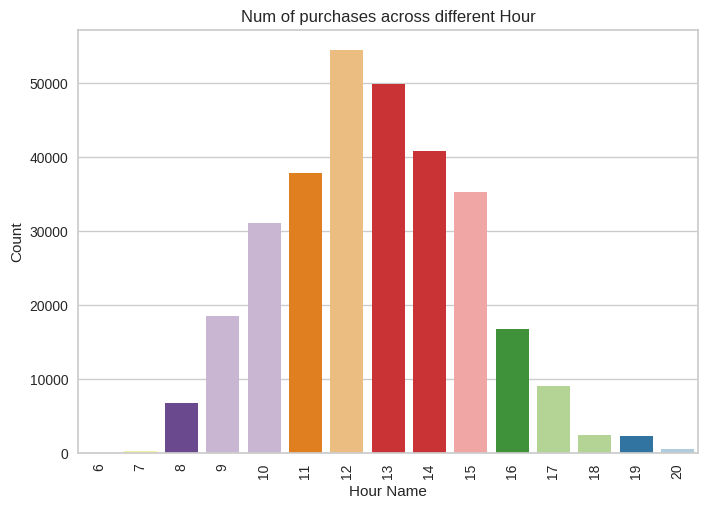

In [121]:
sns.barplot(x='Hour Name',y='Count',data=hour,palette='Paired_r')
plt.title("Num of purchases across different Hour")
plt.xticks(rotation = 90)
plt.show()

In [122]:
# group the time into 3 buckets
def time_day(time):
  if (time >= 6 and time <= 11):
    return 'Morning'
  elif (time >= 12 and time <= 17):
    return 'Afternoon'
  else:
    return 'Evening'

# apply the function into the column
cust_data['time_day'] = cust_data['hour'].apply(time_day)
cust_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,day,year,month_num,day_num,hour,minute,month,Total_amount,name_day,season,time_day
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Wednesday,2010,12,1,8,26,December,15.30,Week Day,Winter Season,Morning
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,2010,12,1,8,26,December,20.34,Week Day,Winter Season,Morning
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Wednesday,2010,12,1,8,26,December,22.00,Week Day,Winter Season,Morning
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,2010,12,1,8,26,December,20.34,Week Day,Winter Season,Morning
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,2010,12,1,8,26,December,20.34,Week Day,Winter Season,Morning


In [123]:
time_day = cust_data['time_day'].value_counts().reset_index()
time_day.rename(columns = {'index':'Time of Day','time_day':'Counts'},inplace = True)
time_day

,Time of Day,Counts
0,Afternoon,206206
1,Morning,94304
2,Evening,5248


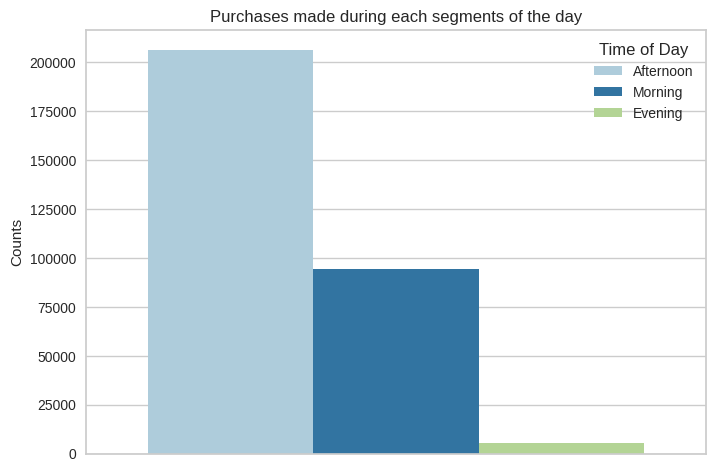

In [124]:
sns.barplot(hue='Time of Day',y='Counts',data=time_day,palette = 'Paired')
plt.title("Purchases made during each segments of the day")
plt.show()

We can infer that more people have purchased during the afternoon and least people have purchased during Evening

# **RECENCY,FREQUENCY,MONETARY MODEL(RFM MODEL)**

RFM analysis numerically ranks a customer in each of these three categories, generally on a scale of 1 to 5 (the higher the number, the better the result). The "best" customer would receive a top score in every category.

These three RFM factors can be used to reasonably predict how likely (or unlikely) it is that a customer will do business again with a firm or, in the case of a charitable organization, make another donation.


The RFM model is based on three quantitative factors:

Recency: How recently a customer has made a purchase

Frequency: How often a customer makes a purchase

Monetary Value: How much money a customer spends on purchases

In [125]:
#FILTERING ONLY UK CUSTOMERS SINCE MAJORITY OF THEM ARE FROM THERE

cust_data = cust_data[cust_data['Country']=='United Kingdom']

cust_data.shape

(270070, 19)

# **Calculating RFM scores:**

In [126]:
# calculating RFM scores
# set latest date to '2011-12-10' as the last invoice date was '2011-12-09'

latest_date = dt.datetime(2011,12,10)

rfm_df = cust_data.groupby('CustomerID').agg({'InvoiceDate': lambda x: (latest_date - x.max()).days, 'InvoiceNo': lambda x: len(x),
                                            'Total_amount': lambda x: x.sum()})

rfm_df['InvoiceDate'] = rfm_df['InvoiceDate'].astype(int)

rfm_df.rename(columns = {'InvoiceDate':'Recency','InvoiceNo':'Frequency','Total_amount':'Monetary'}, inplace = True)
rfm_df.reset_index().head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12747.0,66,85,3444.78
2,12748.0,44,2530,21600.50
3,12749.0,130,128,2755.23
4,12820.0,44,47,731.99


In [127]:
rfm_df.describe()

,Recency,Frequency,Monetary
count,3555.000000,3555.000000,3555.000000
mean,136.230942,75.969058,1615.439239
std,92.770660,163.118215,6289.729668
min,43.000000,1.000000,2.900000
25%,64.000000,15.000000,272.315000
50%,94.000000,36.000000,594.390000
75%,196.000000,85.000000,1406.890000
max,373.000000,5705.000000,232840.680000


<ipython-input-128-a481d8e8352b>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,count)
<ipython-input-128-a481d8e8352b>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rfm_df[feature])
<ipython-input-128-a481d8e8352b>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code 

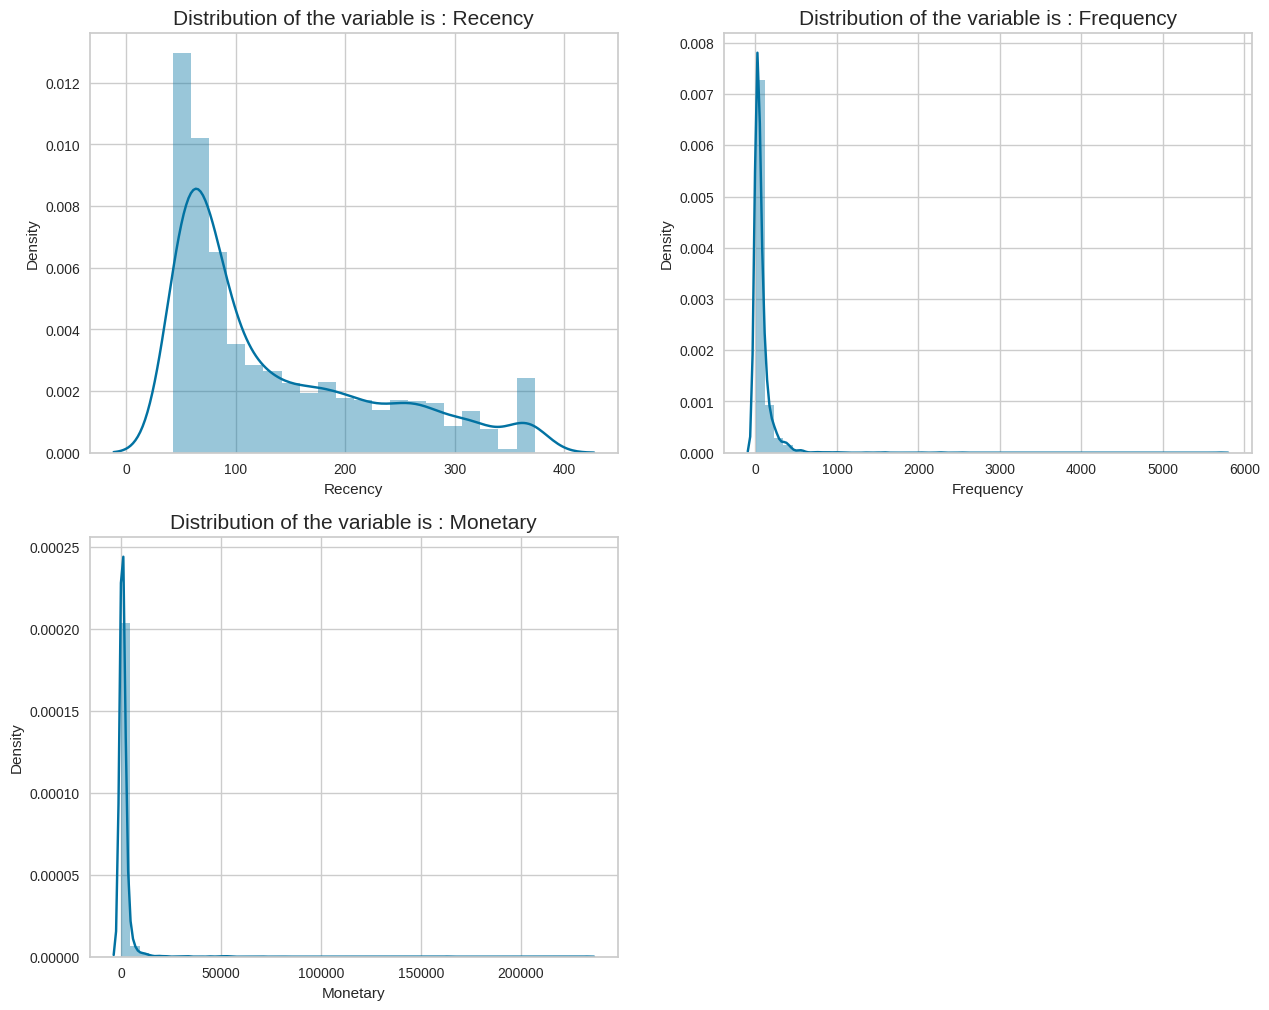

In [128]:
count = 1
plt.subplots(figsize = (15,12))
for feature in rfm_df:
  plt.subplot(2,2,count)
  sns.distplot(rfm_df[feature])
  plt.title(f"Distribution of the variable is : {feature}", fontsize = 15)
  plt.xlabel(f"{feature}")
  plt.ylabel("Density")
  count+=1

In [129]:
# treat the negative and zero values to handle infinite numbers during log transformation

def negative_handling(num):
  if num<=0:
    return 1
  else:
    return num

#Applting function to Recency and Monetary
rfm_df['Recency'] = [negative_handling(x) for x in rfm_df['Recency']]
rfm_df['Monetary'] = [negative_handling(x) for x in rfm_df['Monetary']]

# apply log transfomation to RFM values
log_df = rfm_df[['Recency', 'Frequency', 'Monetary']].apply(np.log, axis=1).round(3)

<ipython-input-130-8da41eafdd8b>:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,count)


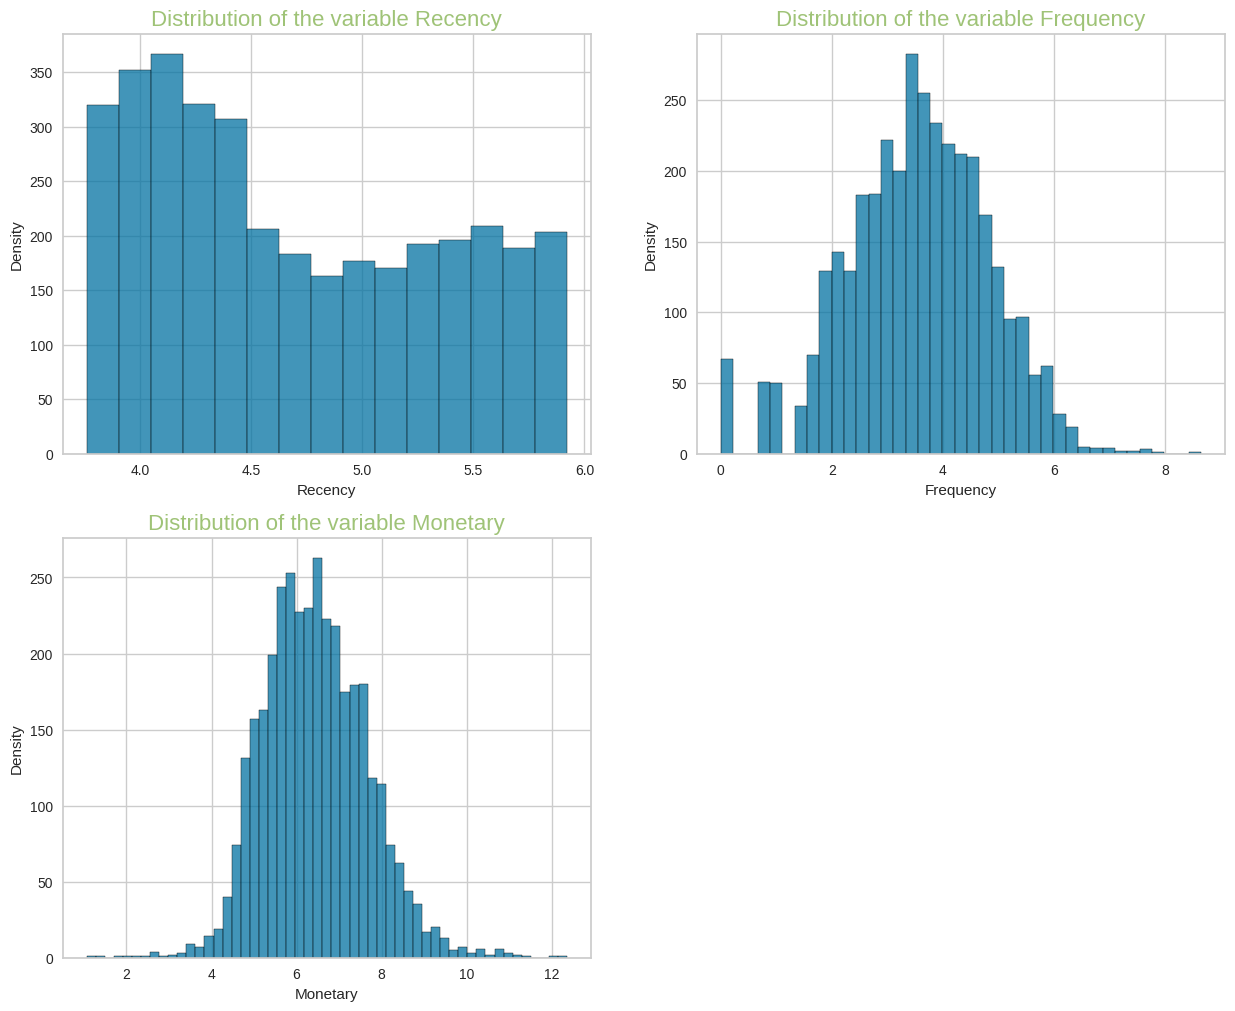

In [130]:
#plotting the log distribution

count =1
plt.subplots(figsize = (15,12))
for feature in log_df:
  plt.subplot(2,2,count)
  sns.histplot(log_df[feature])
  plt.title(f"Distribution of the variable {feature}", fontsize=16,color = 'g')
  plt.xlabel(f"{feature}")
  plt.ylabel("Density")
  count += 1


The distribution of the model now looks normal compared to earlier which was right skewed

In [131]:
# apply log transformation on the original rfm dataframe

from numpy import math

rfm_df['Recency_log'] = rfm_df['Recency'].apply(math.log)
rfm_df['Frequency_log'] = rfm_df['Frequency'].apply(math.log)
rfm_df['Monetary_log'] = rfm_df['Monetary'].apply(math.log)

<ipython-input-131-f55d17b14844>:3: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  from numpy import math


In [132]:
rfm_df.head()

,Recency,Frequency,Monetary,Recency_log,Frequency_log,Monetary_log
CustomerID,,,,,,
12346.0,325,1,77183.60,5.783825,0.000000,11.253942
12747.0,66,85,3444.78,4.189655,4.442651,8.144615
12748.0,44,2530,21600.50,3.784190,7.835975,9.980472
12749.0,130,128,2755.23,4.867534,4.852030,7.921256
12820.0,44,47,731.99,3.784190,3.850148,6.595767


  # **SCALING OUR DATA**

In [133]:
features = ['Recency_log','Frequency_log','Monetary_log']

New_features = rfm_df[features].values
scaler = StandardScaler()
NEW = scaler.fit_transform(New_features)

# **FOR RANDOM INIT**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

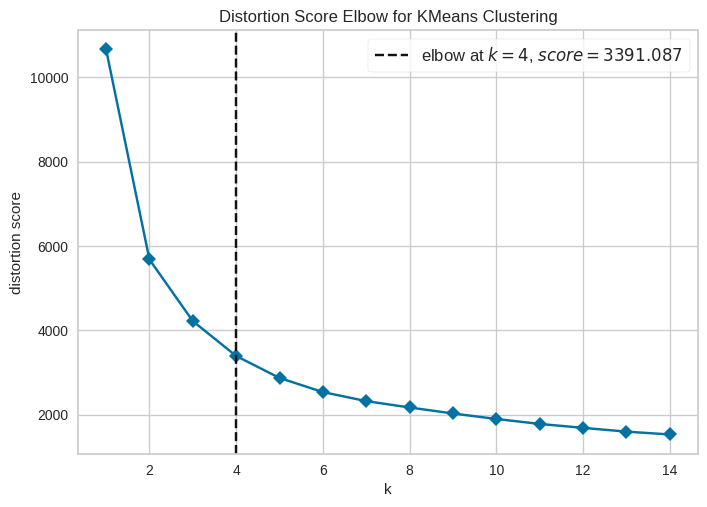

In [134]:
from yellowbrick.cluster import KElbowVisualizer
SSE = {}
for k in range(1,15):
  km = KMeans(n_clusters = k, init = 'random',max_iter = 1000)
  km= km.fit(NEW)
  SSE[k] = km.inertia_

# plot the graph for SSE and number of clusters

visual = KElbowVisualizer(km,k=(1,15),metric='distortion',timings=False)
visual.fit(NEW)
visual.poof()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

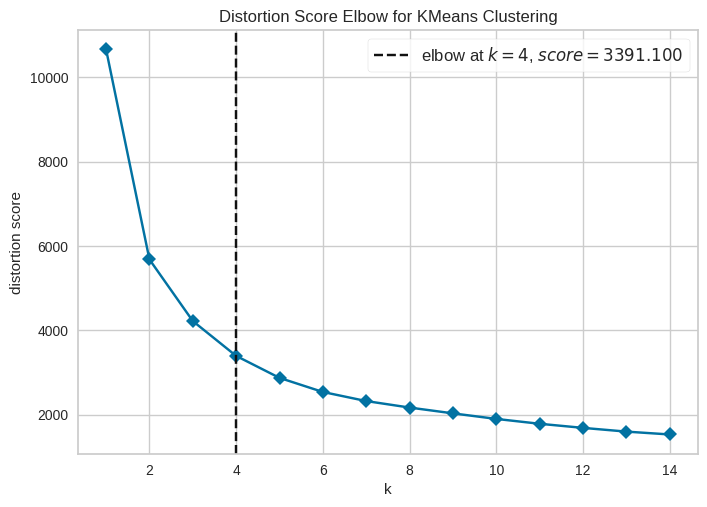

In [135]:
from yellowbrick.cluster import KElbowVisualizer
SSE = {}
for k in range(1,15):
  km = KMeans(n_clusters = k, init = 'random',max_iter = 1000)
  km= km.fit(NEW)
  SSE[k] = km.inertia_

# plot the graph for SSE and number of clusters

visual = KElbowVisualizer(km,k=(1,15),metric='distortion',timings=False)
visual.fit(NEW)
visual.poof()
plt.show()

# **FOR K-MEANS++ INIT:**

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
SSE = {}
for k in range(1,15):
  km = KMeans(n_clusters = k, init = 'k-means++',max_iter = 1000)
  km= km.fit(NEW)
  SSE[k] = km.inertia_

# plot the graph for SSE and number of clusters

visual = KElbowVisualizer(km,k=(1,15),metric='distortion',timings=False)
visual.fit(NEW)
visual.poof()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

* From the elbow method we reach the conclusion that the optimal number of clusters is 3 for Recency, Frequency and Monetary values.

* We will again run the model with number of clusters as 3.

# **CONCLUSION OF RFM ANALYSIS**

# **Cluster 0 :**          

**Recency :**  Moderate(that is around 68 days)

**Frequency:** Moderate(that is around 69 Transactions)

**Monetary:**  Moderate(that is around 1200 Dollars)

**Conclusion:** They have good stats and they can be termed as upcoming loyalist or potential customers. They have a balanced score in all three RFM metrics. These customers have the potential to become more valuable if they are properly nurtured. Effective marketing strategies, loyalty programs, Offers and incentives to increase their purchase frequency.


# **Cluster 1 :**          

**Recency :**  High(that is around 165 days)

**Frequency:** Low(that is around 15 Transactions)

**Monetary:**  Low(that is around 290 Dollars)

**Conclusion:** They have poor stats and they can be termed as At risk customers or churned customers. They have  very less score in all three RFM metrics.  These customers might have been one-time buyers or occasional shoppers. Providing better service and incentives might pull them back.

# **Cluster 2 :**          

**Recency :**  High(that is around 11 days)

**Frequency:** High(that is around 259 Transactions)

**Monetary:**  Very High(that is around 5900 Dollars)

**Conclusion:** This cluster represents your 'Champions' or 'Loyal' customers. They shop frequently, recently, and spend the most. They are the most valuable segment, likely to respond positively to new offers, up-sell and cross-sell opportunities. Maintaining their high engagement level is crucial, and they can also be targeted for feedback or as brand ambassadors.

# **OVERALL CONCLUSION**

*   The Five most sold products are WHITE HANGING HEART T-LIGHT HOLDER And REGENCY CAKESTAND 3 TIER.

*   The least sold products are : Green with metal bag charm and White with metal bag charm and so on..

*   We can see that majority of the customers are from United kingdom followed by small portions of Germany,France etc..

*   We can see that there are only 4338 customers present and are responsible for all these transactions let us now understand the percentage share of the top 10 customers

*   From the above figure we can infer that the top ten customers out of 4338 have contributed nearly 8 to 9% of total share.
We can infer them as big buyers or wholesalers.

*   From the above distribution plots are heavily right skewed. it is very hard to find out the distribution hence we will apply log Transformation function to it.

*   We can infer from the chart that people have purchased more items on Thursday followed by Wednesday and Tuesday and people have purchased least on Fridays.

*   We can infer that people have purchased more on week days rather than holidays or weekends.

*   People have purchased more on November followed by October and December may be due to Festivals and people have purchased least during Feb this may be due to Winter season

*   We can see that people have made more purchases in Autumn season that is during the months of September,October and November.

*   We can infer that more people have purchased during the afternoon and least people have purchased during Evening

*   From the elbow method we reach the conclusion that the optimal number of clusters is 3 for Recency, Frequency and Monetary values.

*   Cluster2 represents your 'Champions' or 'Loyal' customers.






























